# Workshop : Python, DICOM Files and Beyond

Welcome to the Module 3 workshop! Today, we will be covering the basics of working with DICOM files in Python. DICOM files are containers of radiographic data holding **the image** and supporting **metadata**.

In this notebook, we will introduce you to a very handy library in Python called *Pydicom*. We will use this tool to read DICOM files, extract important pieces of information, visualise 2D and 3D images as well as using DICOM files to gain insight into our data.

During our workshop we would like you to try to use Pydicom's documentation to explore more on its functionality : https://pydicom.github.io/pydicom/stable/tutorials/dataset_basics.html

## Acquiring the dataset

For this workshop, we will use [this hippocampus MRI dataset](https://www.kaggle.com/datasets/aryashah2k/hippocampal-sparing-dataset). It has a CC BY 3.0 licence, which means it is free to use for commercial use.

**To download the dataset run the following terminal commands:**




In [1]:
!kaggle datasets download aryashah2k/hippocampal-sparing-dataset
!unzip hippocampal-sparing-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.501022228540212516917190089968481930160.dcm  
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.50177356156582408524609120767479983274.dcm  
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.50223706205994243334064048187092715188.dcm  
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.50236502520221546254625244399229387658.dcm  
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.50336380507789944482467138306285285036.dcm  
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.5036182352724883201752819040700814464.dcm  
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.505073119414825032311981221394206268077.dcm  
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.505193160354713075413142337458077491335.dcm  
  inflating: HippocampalMRISlices/09/MR.1.2.246.352.221.505492665320706983214328050460158845060.dcm  
  inflating: HippocampalMRISlices/09/

*N.B. if you are not using Google Colab to run this cell, you can run these commands in your terminal without the preceding* `!`.

*N.B. If you are running this locally, you may need to install `kaggle` using PIP.*

## Preparing our workspace

Before we start, please make sure you are set up with the required packages by running the following cell:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Unfortunately, the `pydicom` package is not preinstalled into Google Colab's environments by default. Therefore, we need to install it by running a terminal command using a `!`:

In [4]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.2 MB/s eta 0:00:00


Now that the package is installed, we can import it into our Python environment:

In [52]:
import pydicom

Our environment is now set up! Take a moment to look through the directory for the hippocampal MR data. What is its structure? How are the files arranged?

## Part 1 - Loving Your Metadata

We will start by opening an example file from the folder. This can be done using the `dcmread` method from the package. Run the following cell to see the structure of the DICOM file after opening it.

As this is an MRI study, multiple files account for mutiple slices. For now, we will only read on single slice for every patient to extract relevant metadata.

In [8]:
# Example DICOM image filepath
example_fp = "HippocampalMRISlices/01/MR.1.2.246.352.221.478795775126922662561249727364263601.dcm"

example_dcm = pydicom.dcmread(example_fp)

example_dcm

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 182
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.246.352.221.478795775126922662561249727364263601
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002,0013) Implementation Version Name         SH: 'DCIE 2.2'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008,0012) Instance Creation Date              DA: '20220622'
(0008,0013) Instance Creation Time              TM: '115002'
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                 

## Exercise 1 - Printing human-readable text

The `.dir()` method in Python returns a list of attributes and methods of the object it is called on. For DICOM files, this will show us all of the metadata tags associated with the file.

This allows us to inspect which attributes can be accessed through **dot notation**. For example:



In [9]:
print(example_dcm.PatientID)

uWiqM844A9jDh4pqNrtDs59C2


For this exercise, use the `.dir()` method to inspect all of the available metadata tags. Use these tags to print a description in the following form:

*Patient with ID  of {patient ID} had undergone an {modality}. The scanner was manufactured by {manufacturer}.
Patient position was {position of patient while undergoing study} and and received contrast via {way of contrast intake}.*

In [ ]:
# Write your solution here...

### Solution

In [10]:
## To access an item of the DICOM metadata, you need to use its corresponding pydicom attribute
print(example_dcm.dir())

['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ContrastBolusAgent', 'ContrastBolusRoute', 'DeidentificationMethod', 'DeidentificationMethodCodeSequence', 'EchoTime', 'EchoTrainLength', 'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'LongitudinalTemporalInformationModified', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'PatientBirthDate', 'PatientID', 'PatientIdentityRemoved', 'PatientName', 'PatientPosition', 'PatientSex', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'PositionReferenceIndicator', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'ScanOptions', 'ScanningSequence', 'SequenceVariant', 'SeriesInstanceUID', 'SeriesNumber', 'SliceLocation', 'SliceThickness', 'SoftwareVersions', 'SpecificCharacterSet', 'StudyDate', 'S

In [17]:
print(f"Patient with ID {example_dcm.PatientID} ", end="")
print(f"had undergone an {example_dcm.Modality}.")

print(f"The scanner was manufactured by {example_dcm.Manufacturer}. ")

print(f"Patient position was {example_dcm.PatientPosition} ",  end="")
print(f"and received contrast via {example_dcm.ContrastBolusRoute} ")

Patient with ID uWiqM844A9jDh4pqNrtDs59C2 had undergone an MR.
The scanner was manufactured by GE MEDICAL SYSTEMS. 
Patient position was HFS and received contrast via IV 


**Solution explanation**

We print the output of the `.dir()` method to see all of the metadata tags that are available to us. We can then manually select the tags to access to print our description.

### Anonymisation of images

Note you might find that many of the metadata dicom tags such age, gender, name and study date are empty. This is because this data is for public use and has been deindentified.

Also note the "Patient Identity Removed" attribute being saved as "Yes" so you can check if your data has been appropriately de-identified or not.

## Exercise 2 - How many patients were given contrast?

During the last exercise, we accessed the metadata tag which describes what type of contrast the patient was given.

For this task, extract the contrast tag for the first DICOM file in each patient directory in the dataset and work out what percentage of patients in the dataset were given **IV contrast**.

In [ ]:
## Write your solution here...

### Solution

In [53]:

base_folder = "HippocampalMRISlices"

num_of_IVs = 0

for patient in os.listdir(base_folder):

    pt_path = os.path.join(base_folder, patient)

    # Extract the first element of the patient's folder.
    first_slice = os.listdir(pt_path)[0]

    # Form the full path to the DICOM file we want to read.
    full_path = os.path.join(pt_path, first_slice)

    # Read the DICOM
    tmp_dcm = pydicom.dcmread(full_path)

    # Check if the DICOM has this tag and that it is an IV
    if "ContrastBolusRoute" in dir(tmp_dcm):
        if tmp_dcm.ContrastBolusRoute == "IV":
            num_of_IVs += 1

# Get the number of patient folders.
num_of_pts = len(os.listdir(base_folder))

percentage = (num_of_IVs / num_of_pts) * 100.0

print("Patients with IV contrast administered: {:.1f}% ".format(percentage))

Patients with IV contrast administered: 56.0% 


**Solution explanation**

To figure this out, we first iterate over every patient folder in the dataset. We then extract the first DICOM file in each patient file and check if it has the appropriate tag. If it has, we check that it represents IV contrast.

We use the number of directories in the dataset to determine how many patients are in the dataset.

We use string formatting at the end to print the percentage clearly.

## Exercise 3 - Checking for anonymisation

Data anonymisation is a very important part of information governance and patient confidentiality when working with digital data.

Write a function, based on your answer to the last exercise, which checks if every file in the entire dataset has been anonymised. You may need to return back to your tag printing at the start of the workbook to identify an appropriate tag to work out whether the identity of the patient is removed from each DICOM file.

Your function should throw an exception if it detects non-anonymised data.

*To extend this exercise - this function takes a little while (less than 1 minute) to run. How could you indicate progress to the user? Could you add a function argument to control the 'verbosity' of the output?*

In [ ]:
# Write your solution here...

### Solution

In [38]:
print(dir(example_dcm))

['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ContrastBolusAgent', 'ContrastBolusRoute', 'DeidentificationMethod', 'DeidentificationMethodCodeSequence', 'EchoTime', 'EchoTrainLength', 'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'LongitudinalTemporalInformationModified', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'PatientBirthDate', 'PatientID', 'PatientIdentityRemoved', 'PatientName', 'PatientPosition', 'PatientSex', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'PositionReferenceIndicator', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'ScanOptions', 'ScanningSequence', 'SequenceVariant', 'SeriesInstanceUID', 'SeriesNumber', 'SliceLocation', 'SliceThickness', 'SoftwareVersions', 'SpecificCharacterSet', 'StudyDate', 'S

In [50]:
base_folder = "HippocampalMRISlices"

for patient in os.listdir(base_folder):

    pt_path = os.path.join(base_folder, patient)

    for mr_slice in os.listdir(pt_path):

        full_path = os.path.join(pt_path, mr_slice)
        dcm_tmp = pydicom.dcmread(full_path)

        if "PatientIdentityRemoved" in dir(dcm_tmp):
            if dcm_tmp.PatientIdentityRemoved == "YES":
                continue

        raise Exception("Non-anonymised data detected!")

print("Data is fully anonymised!")

Data anonymised!


**Solution Explanation**

Each patient directory is iterated over using a for loop, and every MR slice in every patient directory is iterated over.

The check at the end uses the `continue` keyword to break the current iteration of the loop and move to the next one. If the loop does not break early, the exception is raised.

This is a succint way to describe our logic - we need each file to have the `PatientIdentityRemoved` tag and for this tag to be `YES`. If not, we need to throw an error.

## Part 2 - Working with Image Data

Next, we will access the image data of our example 2D slice of the MR scan that we opened earlier. We can do this by accessing the `pixel_array` attribute of the DICOM file we have opened:

In [54]:
example_img = example_dcm.pixel_array

## Exercise 3

Investigate this object - what is it's type? What is it's structure? What are the elements like?

Can you figure out how to display it as an image based on the work we did in the previous workshop?

In [55]:
# Type your solution here

numpy.ndarray

### Solution

In [56]:
type(example_img)

numpy.ndarray

In [57]:
example_img.shape

(256, 256)

In [63]:
example_img.dtype

dtype('int16')

In [62]:
print(np.max(example_img), np.min(example_img))

9547 0


### Image representation

We can display the image with the following Pyplot code:

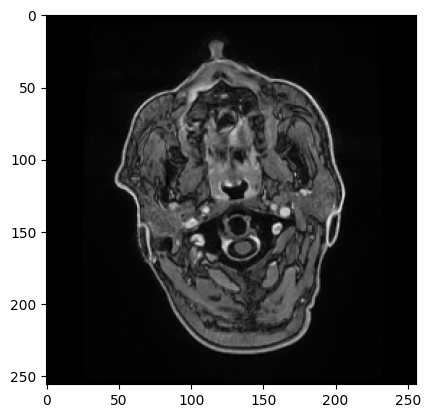

In [110]:
# Plot the image with a grayscale colourmap.
plt.imshow(example_image, cmap="grey")

This is a good rendering of this scan, but it hides a lot of detail about how the image is represented that is important to understand.

The following code demonstrates that the image is encoded in signed 16-bit integers:

In [111]:
example_img.dtype

dtype('int16')

If we directly display this image with PIL, it automatically scales the values and the *image appears dark*. This is because the maximum value is represented by white and is mapped to a value of 32767. This effect is shown below:

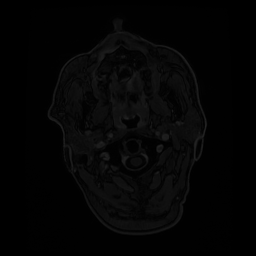

In [116]:
from PIL import Image

disp_img = example_img.astype("uint8")
im = Image.fromarray(example_img)
display(im)

The DICOM attributes hold important information for making sense of this. The `Window Centre` and `Window Width` attributes describe how to **map** the values in the pixel array to black and white:

* The value between black and white (0.5) is mapped to the window's centre.
* The values at each end of the window are mapped to black and white respectively.

For example, if the window centre is 300 and the window width is 200:

* Black would be represented by 100
* White would be represented by 500

This allows us to inspect a certain part of the image's **dyanamic range**. This is needed as screens cannot display the full width of data that is represented. 

This concept is especially important when displaying different parts of a CT scan. Different window settings allow us to change the contrast between different parts of the anatomy displayed. Refer to the seminar for examples of different window settings and the way that this allows radiologists to examine different tissues.

## Exercise 3 - DICOM Windowing

We've looked into the image data within the DICOM file. Now use the Window width and Window centre attributes within the DICOM file to render the pixel array data using PIL.

*Hint: Normalise all of the image values between 0.0 and 1.0 floating point first, and convert the final image from there...*

In [ ]:
# Write your solution here...

### Solution

In [121]:
print(example_dcm.Rows, example_dcm.Columns)

256 256


**Solution explanation**

We can see from these outputs that the image is a 2D NumPy array with 16-bit integer elements. This is already slightly different to what we have come across before - usually the integers ranged between 0-255: 8-bit integers.

This is represented in the maximum and minimum values of the array, with the maximum being much higher than 255.

If we ignore this and use

In [26]:
## TASK 1 : find a dicom attribute(s) that can tell you size of image without accessing array
print(example_dcm.Rows,",", example_dcm.Columns)

256 , 256


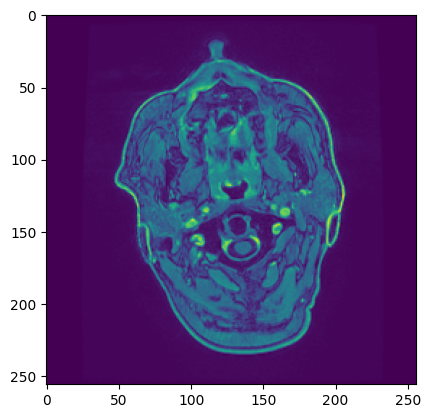

In [27]:
## TASK 2: Use plt.imshow to plot our slice
plt.imshow(example_image)

In [28]:
## TASK 3 : find the relevant dicom tag and determine the location of this slice
example_dcm.
print(f"position of slice is {example_dcm.SliceLocation}")


SyntaxError: invalid syntax (<ipython-input-28-8cd2902cc1e4>, line 2)

## Understanding `SliceLocation` in DICOM

The **`SliceLocation`** tag in a DICOM file represents the **relative position** of a slice along the scanning axis. It is usually measured in **millimeters (mm)**.

### 🔹 What Does `SliceLocation = -48` Mean?
- The slice is **48mm away from a reference plane** defined by the scanner.
- A **negative value** means the slice is **below the reference point**.

### 🔹 Key DICOM Tags for Positioning
| DICOM Tag | Meaning |
|-----------|---------|
| **`SliceLocation`** `(0020,1041)` | Relative position of the slice (scanner-defined). |
| **`ImagePositionPatient`** `(0020,0032)` | Absolute 3D coordinates of the slice in patient space (x, y, z). |
| **`ImageOrientationPatient`** `(0020,0037)` | Defines the anatomical plane (axial, sagittal, coronal). |

### 🔹 How to Interpret the Reference Plane
- **Axial (Transverse)** → Z changes → Example: Brain MRI  
- **Sagittal** → X changes → Example: Side view of the body  
- **Coronal** → Y changes → Example: Front-facing chest scan  

### 🔹 Summary
✅ `SliceLocation = -48` means **the slice is 48mm below the scanner's reference plane**.  
✅ **Use `ImagePositionPatient` for exact positioning.**  
✅ **Check `ImageOrientationPatient` to determine the slice orientation.**


`ImageOrientationPatient` Interpretation

* [1, 0, 0, 0, 1, 0] → Axial (Transverse)
* [0, 1, 0, 0, 0, 1] → Sagittal
* [1, 0, 0, 0, 0, 1] → Coronal

---


In [ ]:
print(example_dcm.ImagePositionPatient)

[-126.551, -173.907, -48.6826]


OK alot to unpack here the next few tasks needs some deep thinking from what we understand now that `ImagePositionPatient` and `SliceLocation` can help tell where is you slice located

We will now put all slices together in one numpy object so we can have an entire MRI scan available just for us to have fun with !!

Do not worry we will do this with small steps.

In [ ]:
## first let us try with one patient
first_patient_path="HippocampalMRISlices/01"

## creating a list of all path for slices inside the "O1" folder
dicom_files = [os.path.join(first_patient_path, f) for f in os.listdir(first_patient_path) if f.endswith('.dcm')]


In [ ]:
dicom_files[:3]

['HippocampalMRISlices/01/MR.1.2.246.352.221.46787942017866730226715780381946763929.dcm',
 'HippocampalMRISlices/01/MR.1.2.246.352.221.50526402510691757024825675546156477337.dcm',
 'HippocampalMRISlices/01/MR.1.2.246.352.221.49425505473402902245619940186516114354.dcm']

In [ ]:
## creating on large list of dicom objects for every slice of the patient 01
slices = [pydicom.dcmread(f) for f in dicom_files]

In [ ]:
## now sort the list using ImagePositionPatient
slices.sort(key=lambda x: float(x.SliceLocation) if "SliceLocation" in x else float("inf"))
## if is added here as some slices might have this attribute missing - so we throw them to the back
## infinity , a very large number, will be sorted last

In [ ]:
#ok now the fun part
# TASK 4
# using .PixelArray to bring all slices in one 3d numpy array
## add if to your list comprehension to account for corrupt files without PixelData
one_3d=np.array([s.pixel_array for s in slices if "PixelData" in s])

In [ ]:
one_3d.shape

(276, 256, 256)

this means we have 276 slices each 256 by 256

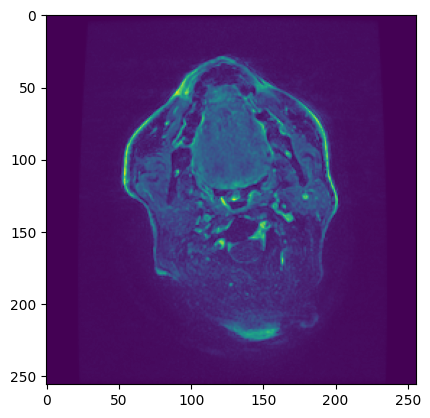

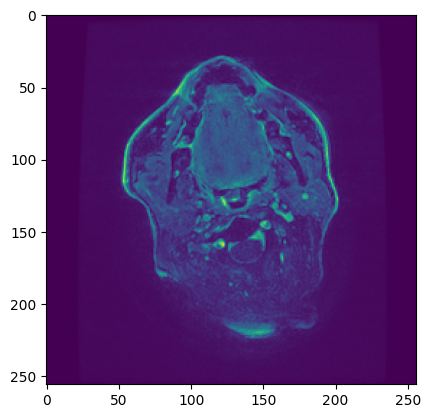

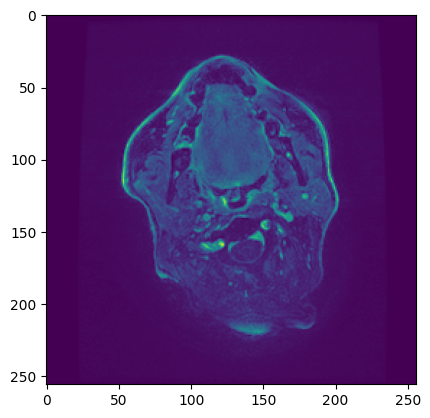

In [ ]:
## TASK 5
## show the first 4 arrays and the last 4 arrays to check if sorting was really done properly
for slice in one_3d[:3]:
    plt.imshow(slice)
    plt.show()

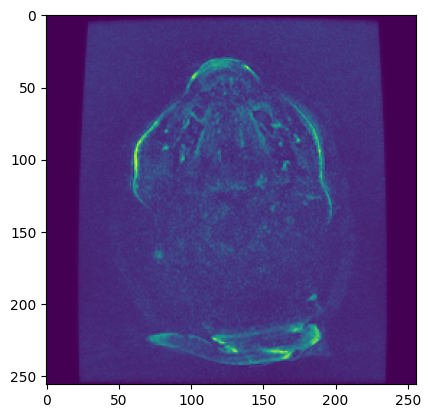

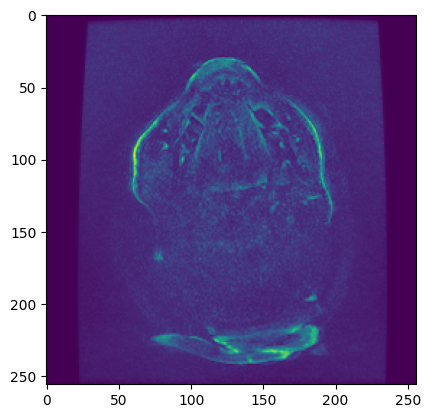

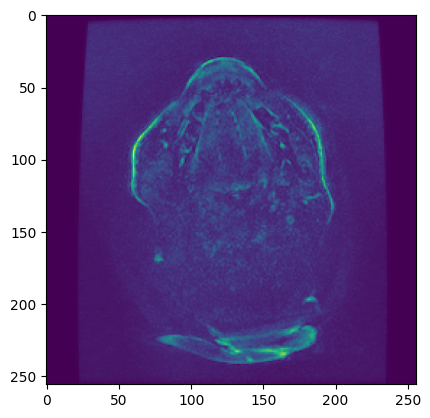

In [ ]:
for slice in one_3d[-4:-1]:
    plt.imshow(slice)
    plt.show()

AHA our sorting seems correct !!

Now one final endeavour !
Having a 3D image allows you to reconstruct an image and view it in a different plane than the plane it was captured on

In [ ]:
## TASK 6 : refer to our explanation earlier and relevant dicom tag to decide on the plane of our image
example_dcm.ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

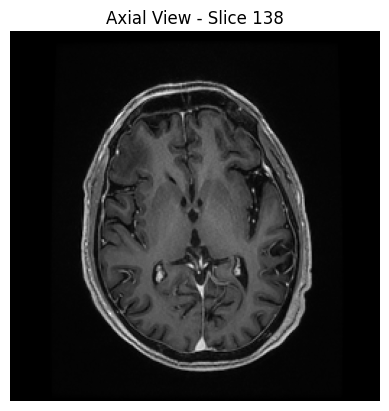

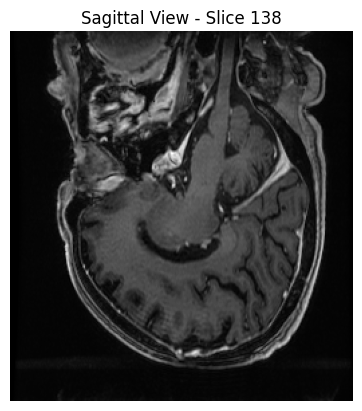

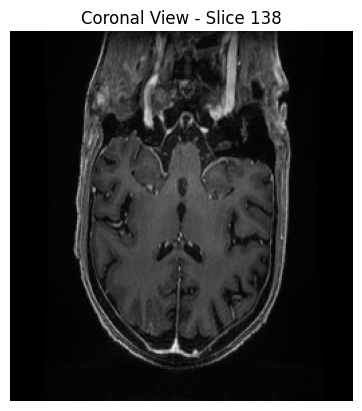

In [ ]:
## remember the planes? our 3D image is using a z,x,y coordinate system
# TASK 6 : complete the following fucntion to show axial , sagital and coronal planes

def show_plane(volume, plane="axial", slice_idx=None):
    """Display an MRI slice in the specified plane (axial, sagittal, coronal)."""
    num_slices = volume.shape[0]  # Number of slices in original acquisition

    # Auto-select a middle slice if not specified
    if slice_idx is None:
        slice_idx = num_slices // 2

    if plane == "axial":
        slice_img = volume[slice_idx, :, :]  # Z-axis slice
    elif plane == "sagittal":
        slice_img = volume[:, :, slice_idx]  # X-axis slice ####### COMPLETE THIS
    elif plane == "coronal":
        slice_img = volume[:, slice_idx, :]  # Y-axis slice ####### COMPLETE THIS
    else:
        raise ValueError("Invalid plane! Choose from 'axial', 'sagittal', 'coronal'.")

    # Display the image
    plt.imshow(slice_img, cmap="gray")
    plt.title(f"{plane.capitalize()} View - Slice {slice_idx}")
    plt.axis("off")
    plt.show()

 ## Show different planes
show_plane(one_3d, "axial")     # Default axial view
show_plane(one_3d, "sagittal")  # Sagittal view
show_plane(one_3d, "coronal")   # Coronal view
